In [40]:
import os
import rasterio
import numpy as np
import pandas as pd

import scipy.stats as stats

import cartopy.crs as ccrs
import cartopy.feature as cf
import cartopy.feature as cfeature

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [2]:
tif_dir = '/media/arturo/T9/Data/shapes/Europa/Italy/DEM/dtm_elev_30m_Italy_v2.tif'
dem = rasterio.open(tif_dir)

In [3]:
Station_dir = '/media/arturo/T9/Data/Italy/stations/Italy_raingauges/QC_MIX/METADATA/METADATA_INTENSE_OLD.csv'
Station = pd.read_csv(Station_dir)

Station.head(3)

,File,ISO,Region,Code,Name,Elevation,Or_EPSG,CRS_E,CRS_N,Lat,...,INTENSE,AGENCY,Source,TimeZon,Elevation.1,Orig_EPSG,Year_Start,Year_End,INTENSE_Resp,TimeZone
0,IT-322_AA_6535_0060_QCv1.csv,IT-322,Alto-Adige,AA_6535,VANDOIESDISOPRA,746.0,32632.0,710057.0,5187849.0,46.811055,...,UK,Provincia Autonoma di Bolzano,Alto-Adige,UTC,NaN,NaN,NaN,NaN,NaN,NaN
1,IT-322_AA_5650_0060_QCv1.csv,IT-322,Alto-Adige,AA_5650,SELVADEIMOLINI,1141.0,32632.0,718972.0,5196967.0,46.890136,...,UK,Provincia Autonoma di Bolzano,Alto-Adige,UTC,NaN,NaN,NaN,NaN,NaN,NaN
2,IT-322_AA_5690_0060_QCv1.csv,IT-322,Alto-Adige,AA_5690,MOLINIDITURES,851.0,32632.0,724491.0,5198298.0,46.900257,...,UK,Provincia Autonoma di Bolzano,Alto-Adige,UTC,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
coords = [(x, y) for x, y in zip(Station['Lon'], Station['Lat'])]
elev = list(dem.sample(coords)) 
elev = [val[0] for val in elev]   

In [6]:
Station['elevation_DEM'] = elev
Station['elevation_DEM'] = Station['elevation_DEM'].where(Station['elevation_DEM'] >= 0, np.nan)

In [7]:
Station['Elevation_update'] = Station['Elevation'].fillna(Station['elevation_DEM'])

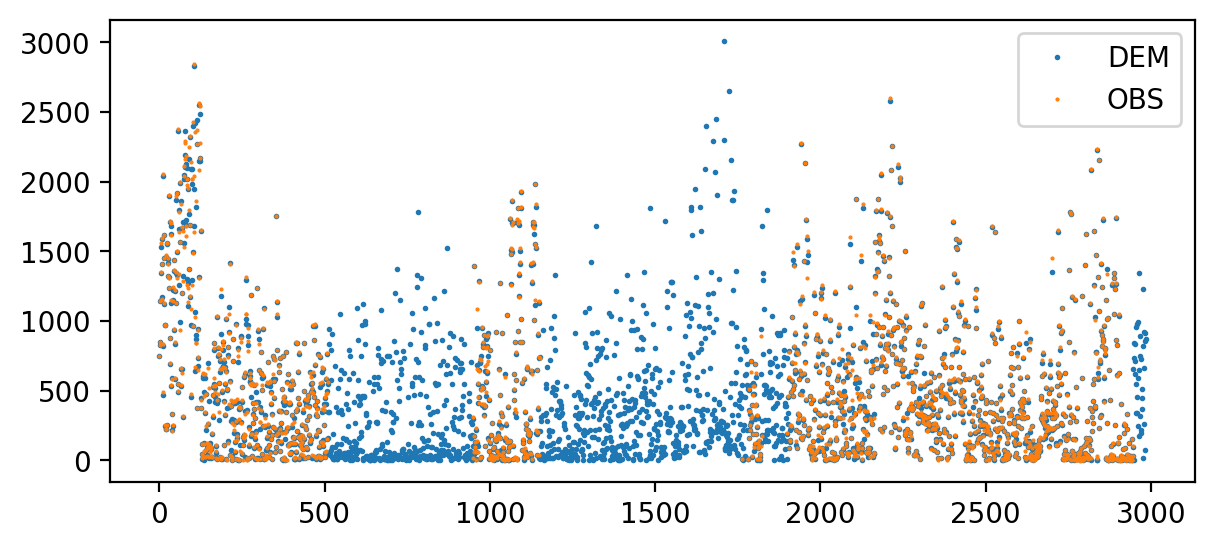

In [8]:
fig = plt.figure(figsize=(7,3),dpi=200)
gs = gridspec.GridSpec(1,1)

ax1 = plt.subplot(gs[0, 0])
ax1.plot(Station['elevation_DEM'],'o',markersize=1,label='DEM')
ax1.plot(Station['Elevation'],'.',markersize=1,label='OBS')
ax1.legend()

In [9]:
Elevation_original = Station['Elevation']
Elevation_original = Elevation_original[~np.isnan(Elevation_original)]
print(f'Total of stations    : {len(Station)} stations')
print(f'Original Elevation   : {len(Elevation_original)} stations')
print(f'Stations without data: {len(Station)-len(Elevation_original)} stations')

Total of stations    : 2985 stations
Original Elevation   : 1799 stations
Stations without data: 1186 stations


Export figure to: ../figures/Article_down/figureS1.png


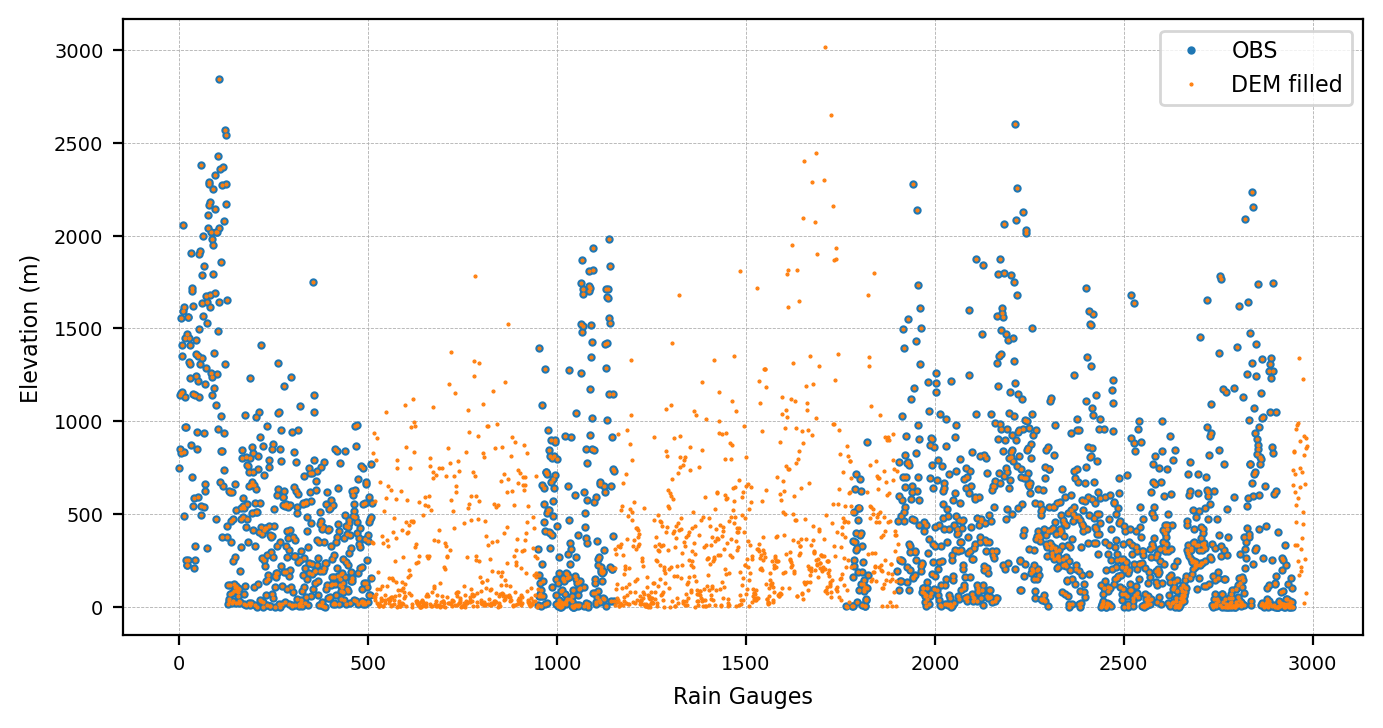

In [31]:
fig = plt.figure(figsize=(8,4),dpi=200)
gs = gridspec.GridSpec(1,1)

ax1 = plt.subplot(gs[0, 0])
ax1.plot(Station['Elevation'],'.',markersize=4,label=f'OBS')
ax1.plot(Station['Elevation_update'],'o',markersize=0.5,label=f'DEM filled')
ax1.legend(fontsize=8)
ax1.grid(linewidth=0.3, linestyle='--')

ax1.tick_params(axis='both', which='major', labelsize=7)
ax1.set_ylabel('Elevation (m)',fontsize=8) 
ax1.set_xlabel('Rain Gauges',fontsize=8)

# ===========================================================================================================================================
salida = os.path.join('..','figures','Article_down','figureS1.png')
print(f'Export figure to: {salida}')
plt.savefig(salida,transparent = False,bbox_inches ='tight',pad_inches = 0.1, facecolor=None)

In [ ]:
dir_out = '/media/arturo/T9/Data/Italy/stations/Italy_raingauges/QC_MIX/METADATA/METADATA_INTENSE_UPDATE.csv'
# Station.to_csv(dir_out, header=True, index=None)

## Compare Elevations 

In [34]:
tif_dir = '/media/arturo/T9/Data/shapes/Europa/Italy/DEM/dem_elev_Pietro.tif'
dem_Pietro = rasterio.open(tif_dir)

In [36]:
coords = [(x, y) for x, y in zip(Station['Lon'], Station['Lat'])]
elev_pietro = list(dem_Pietro.sample(coords)) 
elev_pietro = [val[0] for val in elev_pietro]   

In [37]:
Station['elevation_Pietro'] = elev_pietro
Station['elevation_Pietro'] = Station['elevation_Pietro'].where(Station['elevation_Pietro'] >= 0, np.nan)

In [38]:
Elevation_verify = Station[~np.isnan(Station['Elevation'])]

In [ ]:

corr

np.float64(0.9987771121388651)

Text(1.0, 1.0, 'Correlation: 0.999')

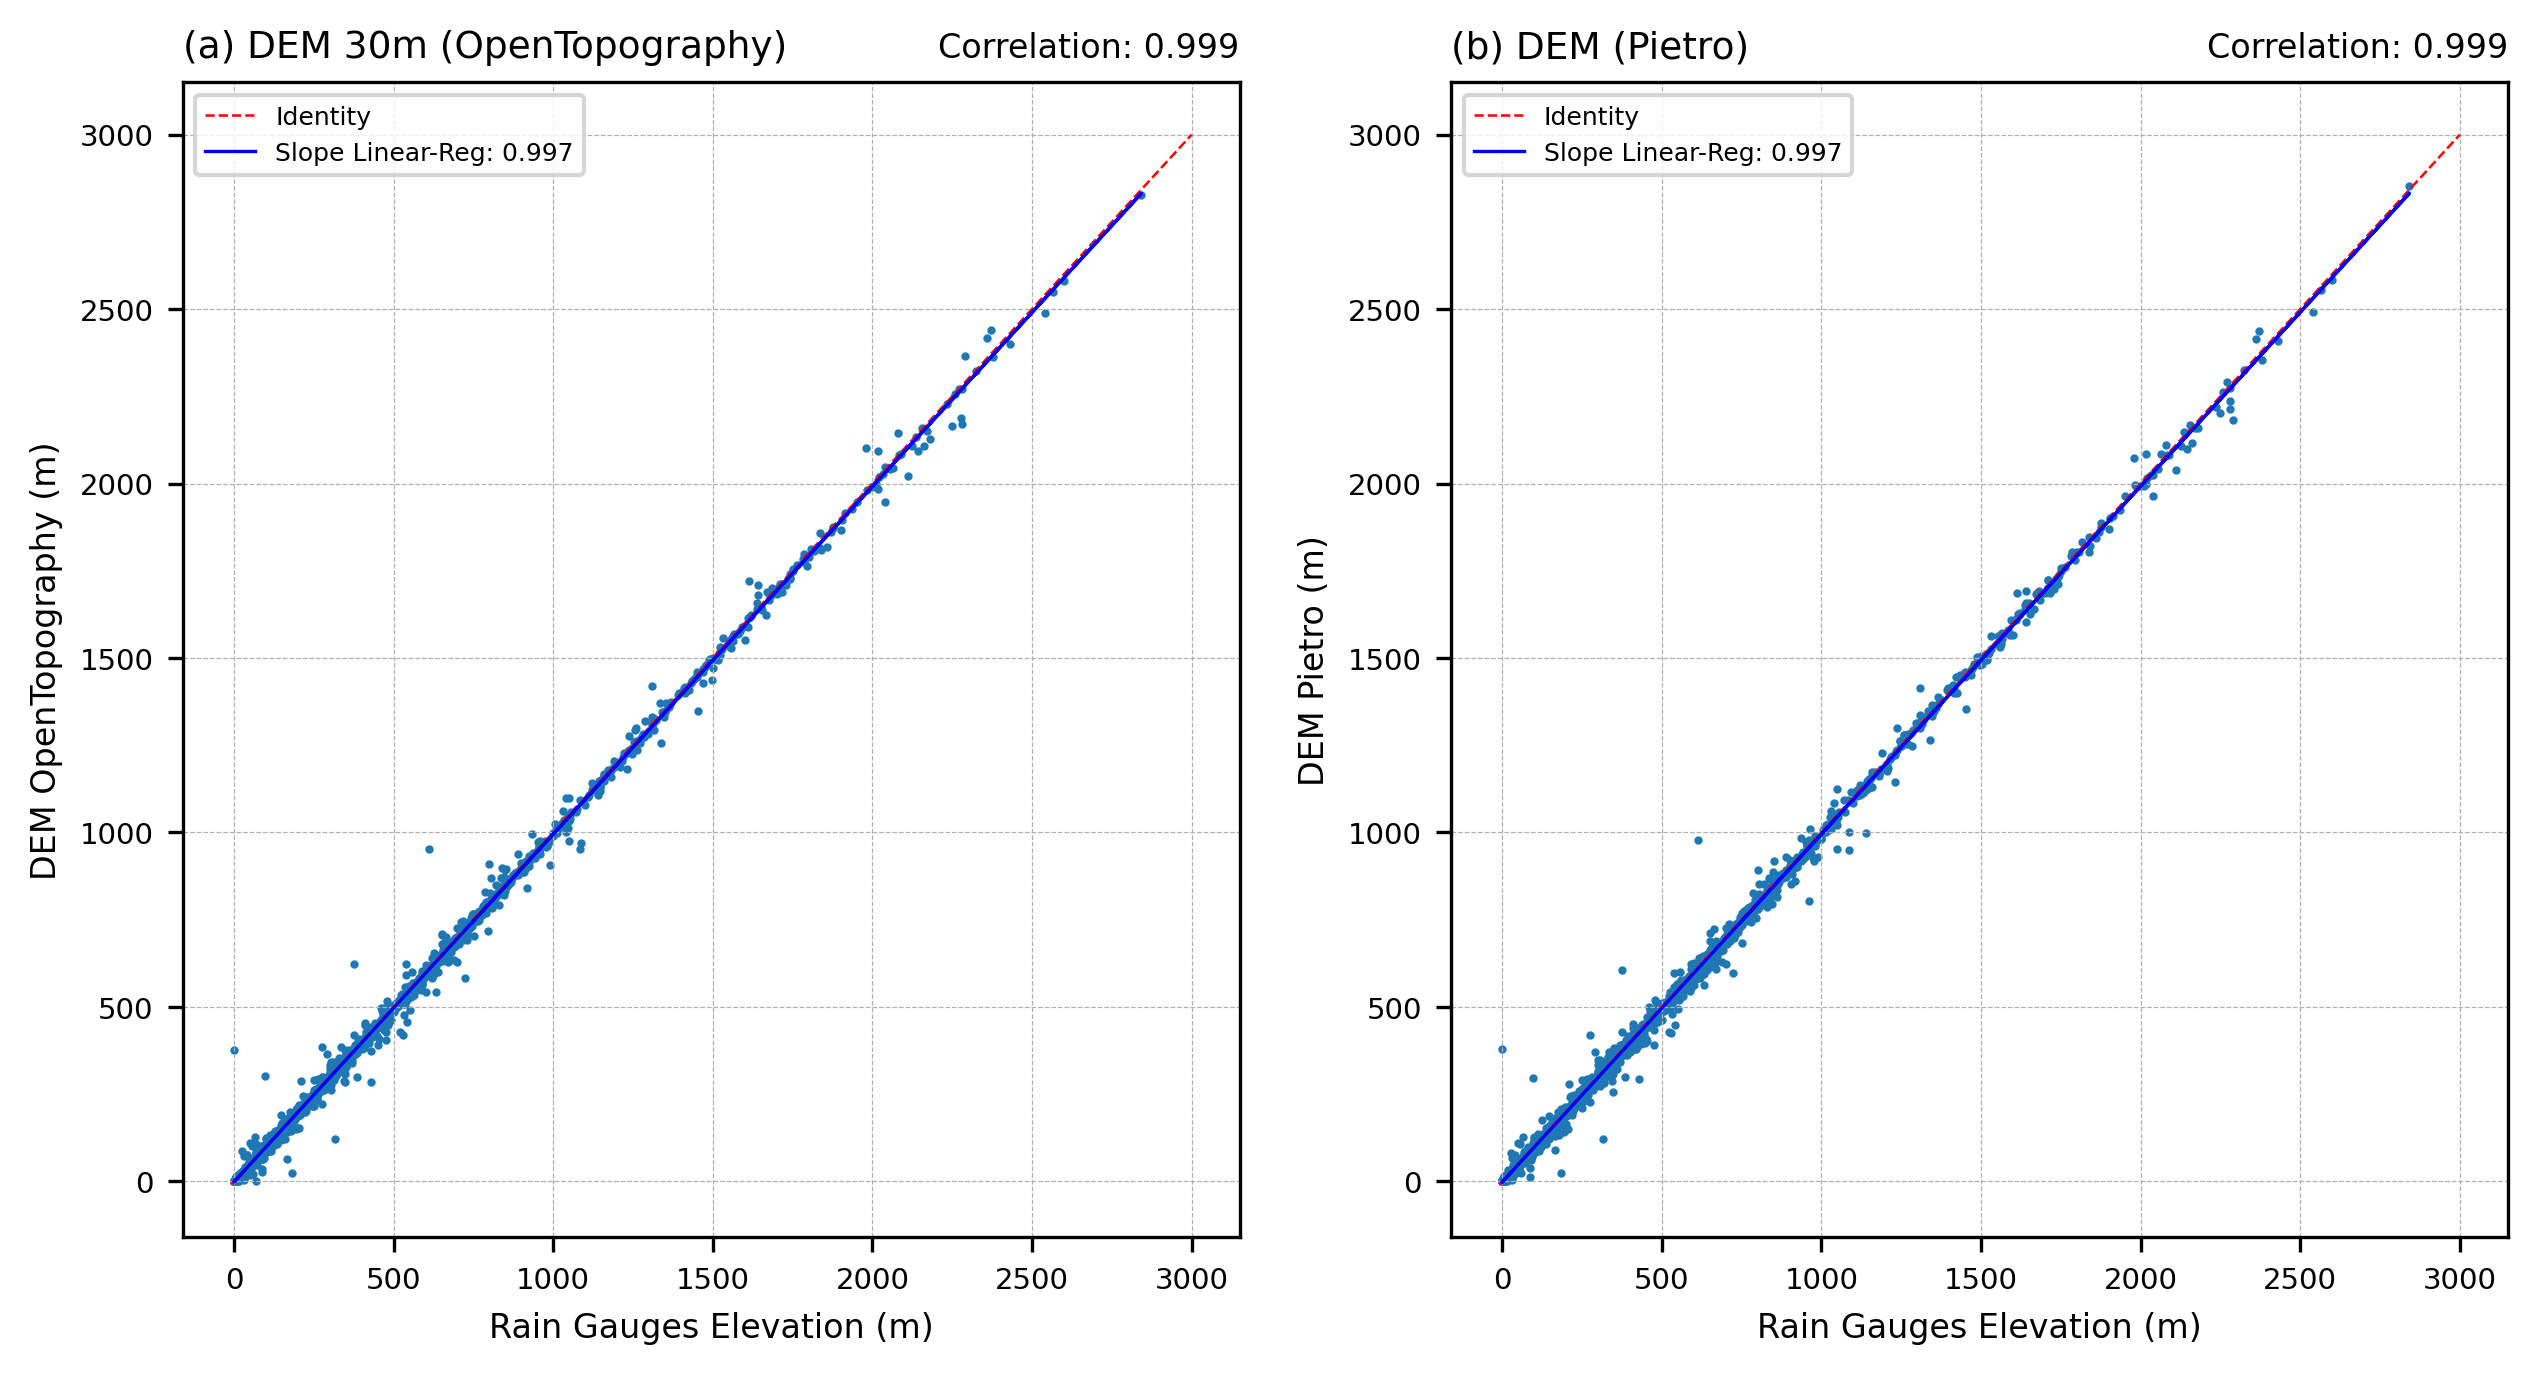

In [69]:
fig = plt.figure(figsize=(10,5),dpi=300)
gs = gridspec.GridSpec(1,2)

# ===========================================================================================================================================
ax1 = plt.subplot(gs[0, 0])
ax1.scatter(Elevation_verify['Elevation'],Elevation_verify['elevation_DEM'],s=1)
ax1.plot([-10, 3000], [-10, 3000], color='r', linestyle='--', linewidth=0.6, label='Identity')

x_in = Elevation_verify['Elevation'].values
y_in = Elevation_verify['elevation_DEM'].values
mask = ~np.isnan(x_in) & ~np.isnan(y_in)
x_clean = x_in[mask]
y_clean = y_in[mask]
corr = np.corrcoef(x_clean, y_clean)[0, 1]
slope, intercept, r_value, p_value, std_err = stats.linregress(x_clean,y_clean)
x_vals = np.array(x_clean)
y_vals = intercept + slope * x_vals
ax1.plot(x_vals, y_vals, color='blue', linewidth=0.8, label=f'Slope Linear-Reg: {np.round(slope,3)}')

ax1.legend(fontsize=6)
ax1.grid(linewidth=0.3, linestyle='--')
ax1.tick_params(axis='both', which='major', labelsize=7)
ax1.set_ylabel('DEM OpenTopography (m)',fontsize=8) 
ax1.set_xlabel('Rain Gauges Elevation (m)',fontsize=8)
ax1.set_title('(a) DEM 30m (OpenTopography)',fontsize=9, loc='left')
ax1.set_title(f'Correlation: {np.round(corr,3)}',fontsize=8, loc='right')

# ===========================================================================================================================================
ax1 = plt.subplot(gs[0, 1])
ax1.scatter(Elevation_verify['Elevation'],Elevation_verify['elevation_Pietro'],s=1)
ax1.plot([-10, 3000], [-10, 3000], color='r', linestyle='--', linewidth=0.6, label='Identity')

x_in = Elevation_verify['Elevation'].values
y_in = Elevation_verify['elevation_Pietro'].values
mask = ~np.isnan(x_in) & ~np.isnan(y_in)
x_clean = x_in[mask]
y_clean = y_in[mask]
corr = np.corrcoef(x_clean, y_clean)[0, 1]
slope, intercept, r_value, p_value, std_err = stats.linregress(x_clean,y_clean)
x_vals = np.array(x_clean)
y_vals = intercept + slope * x_vals
ax1.plot(x_vals, y_vals, color='blue', linewidth=0.8, label=f'Slope Linear-Reg: {np.round(slope,3)}')

ax1.legend(fontsize=6)
ax1.grid(linewidth=0.3, linestyle='--')
ax1.tick_params(axis='both', which='major', labelsize=7)
ax1.set_ylabel('DEM Pietro (m)',fontsize=8) 
ax1.set_xlabel('Rain Gauges Elevation (m)',fontsize=8)
ax1.set_title('(b) DEM (Pietro)',fontsize=9, loc='left')
ax1.set_title(f'Correlation: {np.round(corr,3)}',fontsize=8, loc='right')
